# Final result: 87% accuracy without any pre-trained model.

We made some starting models, observed it's results, and then tweaked the parameters according to the results.

Accuracy could still be improved by improving even more the models, but is enough for this challange.

Next step would be using pre-trained models (out of the scope of this challange).

https://www.freecodecamp.org/learn/machine-learning-with-python/machine-learning-with-python-projects/cat-and-dog-image-classifier

# Cat and Dog Image Classifier

You will be working on this project with Google Colaboratory.

After going to that link, create a copy of the notebook either in your own account or locally. Once you complete the project and it passes the test (included at that link), submit your project link below. If you are submitting a Google Colaboratory link, make sure to turn on link sharing for "anyone with the link."

We are still developing the interactive instructional content for the machine learning curriculum. For now, you can go through the video challenges in this certification. You may also have to seek out additional learning resources, similar to what you would do when working on a real-world project.

For this challenge, you will complete the code to classify images of dogs and cats. You will use TensorFlow 2.0 and Keras to create a convolutional neural network that correctly classifies images of cats and dogs at least 63% of the time. (Extra credit if you get it to 70% accuracy!)

Some of the code is given to you but some code you must fill in to complete this challenge. Read the instruction in each text cell so you will know what you have to do in each code cell.

The first code cell imports the required libraries. The second code cell downloads the data and sets key variables. The third cell is the first place you will write your own code.

The structure of the dataset files that are downloaded looks like this (You will notice that the test directory has no subdirectories and the images are not labeled):

cats_and_dogs

|__ train:

    |______ cats: [cat.0.jpg, cat.1.jpg ...]

    |______ dogs: [dog.0.jpg, dog.1.jpg ...]

|__ validation:

    |______ cats: [cat.2000.jpg, cat.2001.jpg ...]

    |______ dogs: [dog.2000.jpg, dog.2001.jpg ...]

|__ test: [1.jpg, 2.jpg ...]

You can tweak epochs and batch size if you like, but it is not required.

The following instructions correspond to specific cell numbers, indicated with a comment at the top of the cell (such as # 3).

In [2]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

#%pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

%load_ext tensorboard

2025-03-11 21:32:23.974668: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 21:32:23.978631: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 21:32:23.992886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741739544.012453  557218 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741739544.018624  557218 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 21:32:24.041443: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
# Get project files
#!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

#!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

log_dir = os.path.join(PATH, 'logs')
def tensorboard_callback(name):
    return tf.keras.callbacks.TensorBoard(log_dir=log_dir + '/' + name, histogram_freq=1)

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 500
IMG_HEIGHT = 150
IMG_WIDTH = 150

### Cell 3

Now it is your turn! Set each of the variables in this cell correctly. (They should no longer equal None.)

Create image generators for each of the three image data sets (train, validation, test). Use ImageDataGenerator to read / decode the images and convert them into floating point tensors. Use the rescale argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.

For the *_data_gen variables, use the flow_from_directory method. Pass in the batch size, directory, target size ((IMG_HEIGHT, IMG_WIDTH)), class mode, and anything else required. test_data_gen will be the trickiest one. For test_data_gen, make sure to pass in shuffle=False to the flow_from_directory method. This will make sure the final predictions stay in the order that our test expects. For test_data_gen it will also be helpful to observe the directory structure.

After you run the code, the output should look like this:

```
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 class.
```

In [4]:
# 3
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
)
validation_image_generator = ImageDataGenerator(
    rescale = 1./255,
)
test_image_generator = ImageDataGenerator(
    rescale = 1./255,
)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    keep_aspect_ratio=True,
    class_mode='binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    batch_size=batch_size,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    keep_aspect_ratio=True,
    class_mode='binary'
)
test_data_gen = test_image_generator.flow_from_directory(
    directory=PATH,
    batch_size=batch_size,
    shuffle=False,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    keep_aspect_ratio=True,
    classes=['test']
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


### Cell 4
The plotImages function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the train_data_gen variable correctly, then running this cell will plot five random training images.

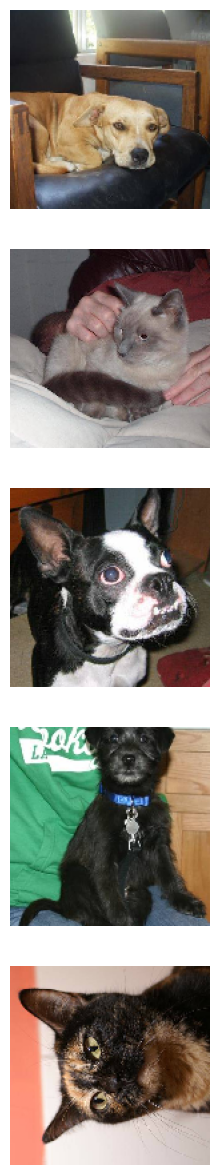

In [5]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

### Cell 5
Recreate the train_image_generator using ImageDataGenerator.

Since there are a small number of training examples, there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Add 4-6 random transformations as arguments to ImageDataGenerator. Make sure to rescale the same as before.

In [6]:
#5
# augmented data

train_augm_image_generator = ImageDataGenerator(
    rotation_range=60,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.5,1.5],
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale = 1./255,
)

### Cell 6
You don't have to do anything for this cell. train_data_gen is created just like before but with the new train_image_generator. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


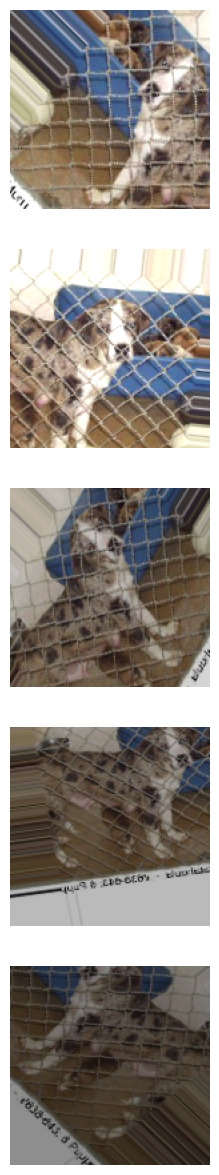

In [7]:
# 6
train_data_gen = train_augm_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    keep_aspect_ratio=True,
    class_mode='binary'
)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

### Cell 7
In this cell, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in metrics=['accuracy'] to view training and validation accuracy for each training epoch.

In [21]:
# 7
model = Sequential([ #67% acc
    Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     4,735,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,791,809 (18.28 MB)

 Trainable params: 4,791,809 (18.28 MB)

 Non-trainable params: 0 (0.00 B)

### Cell 8
Use the fit method on your model to train the network. Make sure to pass in arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.

In [22]:
# 8
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    callbacks=[
      tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30), #early stop if already stabilized
      tensorboard_callback('sizes/initial')], #saves the runs to visualize in TensorBoard
)

#save the results in a file for reuse in new session
file_history = open('P02_history', 'ab')
pickle.dump(history, file_history)                    
file_history.close()

#save the trained model in a file for reuse in new session
file_model = open('P02_model', 'ab')
pickle.dump(model, file_model)                    
file_model.close()

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4925 - loss: 1.3765 - val_accuracy: 0.5000 - val_loss: 0.7015
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5137 - loss: 0.7352 - val_accuracy: 0.4980 - val_loss: 0.7123
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5054 - loss: 0.7100 - val_accuracy: 0.5610 - val_loss: 0.6761
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5527 - loss: 0.6836 - val_accuracy: 0.5260 - val_loss: 0.6969
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5131 - loss: 0.7098 - val_accuracy: 0.5090 - val_loss: 0.6854
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5722 - loss: 0.6824 - val_accuracy: 0.6230 - val_loss: 0.6595
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5704 - loss: 0.6763 - val_accuracy: 0.5140 - val_loss: 0.6857
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5592 - loss: 0.6766 - val_accuracy: 0.6130 - v

In [10]:
# ***ONLY RUN IF RECOVERING FILE FROM A PREVIOUS SESSION!***


file_history = open('P02_history', 'rb')
history = pickle.load(file_history)
file_history.close()

file_model = open('P02_model', 'rb')
model = pickle.load(file_model)
file_model.close()


W0000 00:00:1741719039.769414  541588 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### Cell 9
Run this cell to visualize the accuracy and loss of the model.

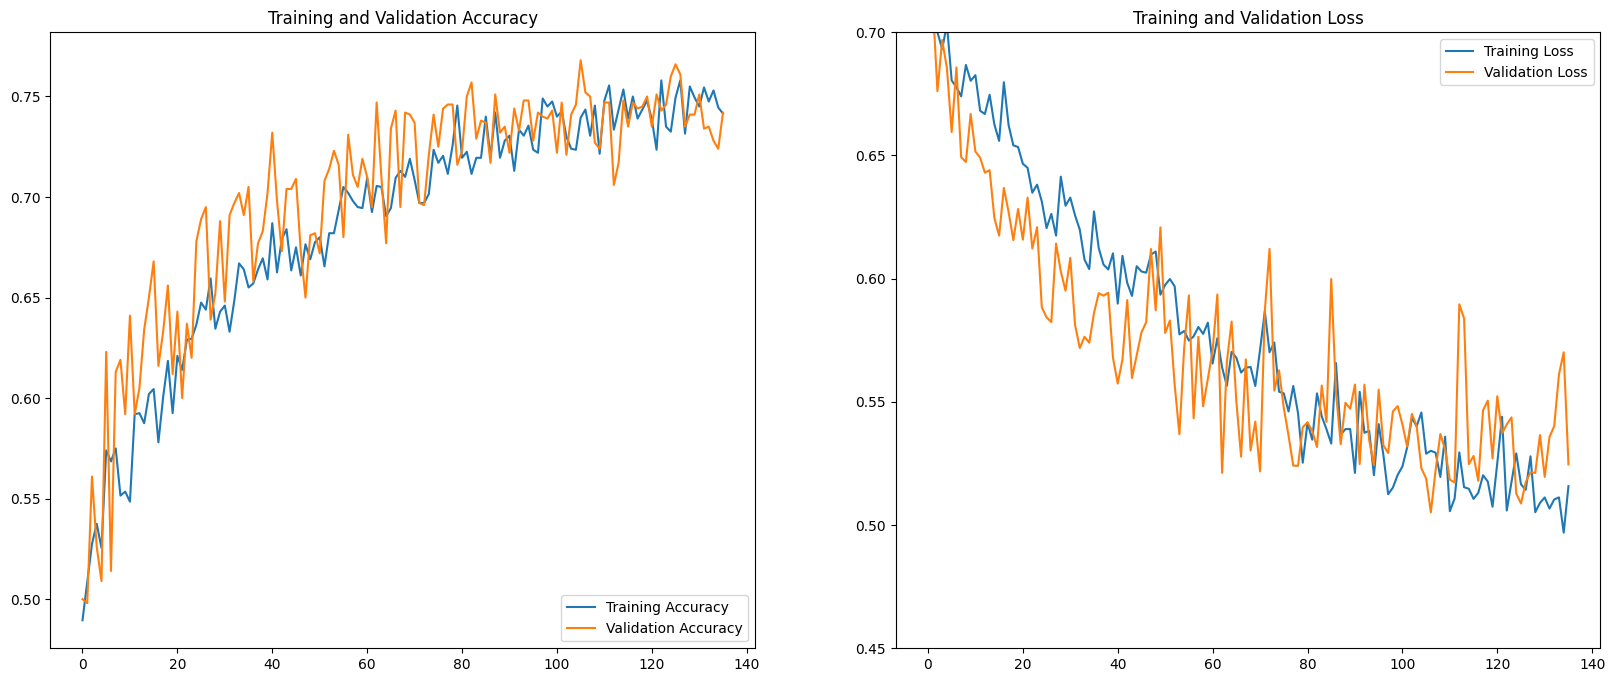

In [11]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0.45, 0.7])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Cell 10
Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this cell, get the probability that each test image (from test_data_gen) is a dog or a cat. probabilities should be a list of integers.

Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.

After you run the cell, you should see all 50 test images with a label showing the percentage of "sure" that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

/home/andreati/Coding/Learning/TensorFlow/.venvTF/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


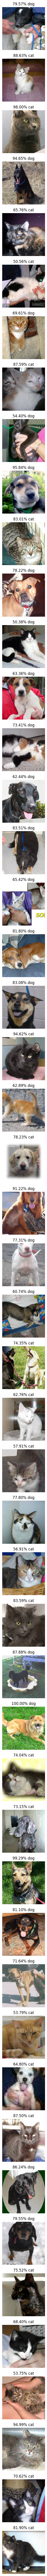

In [12]:
# 10
probabilities = model.predict(test_data_gen).flatten()
test_images, _ = next(test_data_gen)
plotImages(test_images, probabilities)

### Cell 11

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [13]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 80.0% of the images of cats and dogs.
You passed the challenge!


# Challenge completed with 74% accuracy, 80% of the images correctly identified.

# But let's try to improve it a little more:

Let's create a bunch of models with different sizes and parameters...

Then change these models according to the results obtained

In [8]:
#all models are defined in this cell

def init_model(model_type):
  match model_type:
    case 'tiny1':
      model = Sequential([ #74%, no overfitting, 11M
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
      ])
    case 'tiny2':
      model = Sequential([ #50% (bug??), no overfitting, 11M
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
      ])
    case 'tiny3':
      model = Sequential([ #72% , no overfitting, 89M
        Conv2D(128, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
      ])
    case 'tiny4':
      model = Sequential([ #50% (bug??), no overfitting, 89M
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
      ])
    case 'small1':
      model = Sequential([ #76%, no overfitting, 11M
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
      ])
    case 'small2':
      model = Sequential([ #76%, no overfitting, 11M
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
      ])
    case 'small3':
      model = Sequential([ #77%, no overfitting, 85M
        Conv2D(128, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
      ])
    case 'small4':
      model = Sequential([ # 
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
      ])
    case 'medium1':
      model = Sequential([ #80%, slight overfitting, 10M
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(256, activation='relu'),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
      ])
    case 'medium2':
      model = Sequential([ #82%, no overfitting, 10M
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
      ])
    case 'medium3':
      model = Sequential([ #82%, slight overfitting, 38M
        Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
      ])
    case 'medium4':
      model = Sequential([ #
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
      ])
    case 'large1':
      model = Sequential([ #86%, slight overfitting, 8M
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
      ])
    case 'large1.1': #same result as large 1, but less stable and MORE overfitting (!)
      model = Sequential([ #added BathNormalization and dropout
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
      ])
    case 'large2':
      model = Sequential([ #50% (bug??), no overfitting, 8M
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
      ])
    case 'large2.2': #removed one dense layer, reduced dropout and increased l2
      model = Sequential([ #
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.3),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.3),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.3),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
      ])
    case 'large3':
      model = Sequential([ #86%, slight overfitting, 28M
        Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(512, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')
      ])
    case 'large4':
      model = Sequential([ #86%, no overfitting, 28M
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
      ])
    case 'large4.2': #reduced dropout and increased l2
      model = Sequential([ #50% acc
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.3),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.3),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
      ])
    case 'large4.3': #slight reduction on dropout
      model = Sequential([ #
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.4),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.4),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.4),
        Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
      ])
    case 'extra1':
      model = Sequential([ #82%, light overfitting, still slowly increasing acc, 9M
        Conv2D(32, (2, 2), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (2, 2), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (2, 2), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (2, 2), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
      ])
    case 'extra2':
      model = Sequential([ #83%, no overfitting, 9M
        Conv2D(32, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
      ])
    case 'extra2.2': #reduced dropout and l2, first dense increased
      model = Sequential([ #
        Conv2D(32, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.3),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.3),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.3),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.3),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
      ])
    case 'extra3':
      model = Sequential([ #84%, slight overfitting, 35M
        Conv2D(64, (2, 2), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (2, 2), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (2, 2), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(512, (2, 2), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')
      ])
    case 'extra3.2': #added dropout, bath normalization
      model = Sequential([ #
        Conv2D(64, (2, 2), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (2, 2), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (2, 2), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(512, (2, 2), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.3),
        Dense(1024, activation='relu'),
        Dropout(0.3),
        Dense(1024, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
      ])
    case 'extra4':
      model = Sequential([ #84%, no overfitting, 35M
        Conv2D(64, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(512, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
      ])
    case 'extra4.2': #reduced dropout and l2, added one dense layer
      model = Sequential([ #
        Conv2D(64, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(512, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.3),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.3),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.3),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
      ])
    case 'extra5':
      model = Sequential([ #87%, light overfitting, still slowly increasing acc, 7M
        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        # Fourth Convolutional Block (optional but can improve accuracy)
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        # Flatten the output to feed into dense layers
        Flatten(),
        # Fully Connected Layer
        Dense(512, activation='relu'),
        Dropout(0.5),  # Dropout to reduce overfitting
        # Output Layer
        Dense(1, activation='sigmoid')  # Binary classification: cat or dog
      ])
    case 'extra5.2': #added two dense layer, reduced dropout
      model = Sequential([ #87%, light overfitting, still slowly increasing acc, 7M
        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        # Fourth Convolutional Block (optional but can improve accuracy)
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        # Flatten the output to feed into dense layers
        Flatten(),
        Dropout(0.3),  # Dropout to reduce overfitting
        # Fully Connected Layer
        Dense(512, activation='relu'),
        Dropout(0.3),  # Dropout to reduce overfitting
        Dense(512, activation='relu'),
        Dropout(0.3),  # Dropout to reduce overfitting
        Dense(512, activation='relu'),
        Dropout(0.3),  # Dropout to reduce overfitting
        # Output Layer
        Dense(1, activation='sigmoid')  # Binary classification: cat or dog
      ])
    case 'extra5.3': #added one dense layer and l2 reguralizer to the dense layers
      model = Sequential([ #87%, light overfitting, still slowly increasing acc, 7M
        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        # Fourth Convolutional Block (optional but can improve accuracy)
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        # Flatten the output to feed into dense layers
        Flatten(),
        # Fully Connected Layers
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),  # Dropout to reduce overfitting
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dropout(0.5),  # Dropout to reduce overfitting
        # Output Layer
        Dense(1, activation='sigmoid')  # Binary classification: cat or dog
      ])
  return model

In [9]:
def compile_and_fit(train_ds, model_type, name):
  model = init_model(model_type)
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  model.summary()

  history = model.fit(
    train_ds,
    epochs = epochs,
    validation_data = val_data_gen,
    callbacks=[
      tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=80), #early stop if already stabilized
      tensorboard_callback(name)], #saves the runs to visualize in TensorBoard
    #verbose=0
  )
  return [history, model]

In [11]:
histories_0 = {}

#histories_0['Tiny_1'] = compile_and_fit(train_data_gen, 'tiny1', 'sizes/Tiny_1') #74%, no overfitting, 11M
#histories_0['Tiny_2'] = compile_and_fit(train_data_gen, 'tiny2', 'sizes/Tiny_2') #50% (bug??), no overfitting, 11M
#histories_0['Tiny_3'] = compile_and_fit(train_data_gen, 'tiny3', 'sizes/Tiny_3') #72% , no overfitting, 89M
#histories_0['Tiny_4'] = compile_and_fit(train_data_gen, 'tiny4', 'sizes/Tiny_4') #50% (bug??), no overfitting, 89M


#histories_0['Small_1'] = compile_and_fit(train_data_gen, 'small1', 'sizes/Small_1') #76%, no overfitting, 11M
#histories_0['Small_2'] = compile_and_fit(train_data_gen, 'small2', 'sizes/Small_2') #76%, no overfitting, 11M
#histories_0['Small_3'] = compile_and_fit(train_data_gen, 'small3', 'sizes/Small_3') #77%, no overfitting, 85M
#histories_0['Small_4'] = compile_and_fit(train_data_gen, 'small4', 'sizes/Small_4') #??? dead


#histories_0['Medium_1'] = compile_and_fit(train_data_gen, 'medium1', 'sizes/Medium_1') #80%, slight overfitting, 10M
#histories_0['Medium_2'] = compile_and_fit(train_data_gen, 'medium2', 'sizes/Medium_2') #82%, no overfitting, 10M
#histories_0['Medium_3'] = compile_and_fit(train_data_gen, 'medium3', 'sizes/Medium_3') #82%, slight overfitting, 38M
#histories_0['Medium_4'] = compile_and_fit(train_data_gen, 'medium4', 'sizes/Medium_4')

#histories_0['Large_1'] = compile_and_fit(train_data_gen, 'large1', 'sizes/Large_1') #86%, slight overfitting, 8M
#histories_0['Large_2'] = compile_and_fit(train_data_gen, 'large2', 'sizes/Large_2') #50% (bug??), no overfitting, 8M
#histories_0['Large_3'] = compile_and_fit(train_data_gen, 'large3', 'sizes/Large_3') #86%, slight overfitting, 28M

histories_0['Extra_5.3'] = compile_and_fit(train_data_gen, 'extra5.3', 'sizes/Extra_5.3') #

#histories_0['Large_4'] = compile_and_fit(train_data_gen, 'large4', 'sizes/Large_4') #86%, no overfitting, 28M

#histories_0['Large_2.2'] = compile_and_fit(train_data_gen, 'large2.2', 'sizes/Large_2.2') # 50%, no overfitting, 7M
#histories_0['Large_4.2'] = compile_and_fit(train_data_gen, 'large4.2', 'sizes/Large_4.2') # 54%, no overfitting, 28M
#histories_0['Large_1.1'] = compile_and_fit(train_data_gen, 'large1.1', 'sizes/Large_1.1') # 87%, some overfitting, 8M

#histories_0['Extra_1'] = compile_and_fit(train_data_gen, 'extra1', 'sizes/Extra_1') #82%, light overfitting, still slowly increasing acc, 9M
#histories_0['Extra_2'] = compile_and_fit(train_data_gen, 'extra2', 'sizes/Extra_2') #83%, no overfitting, 9M
#histories_0['Extra_3'] = compile_and_fit(train_data_gen, 'extra3', 'sizes/Extra_3') #84%, slight overfitting, 35M
#histories_0['Extra_4'] = compile_and_fit(train_data_gen, 'extra4', 'sizes/Extra_4') #84%, no overfitting, 35M
#histories_0['Extra_5'] = compile_and_fit(train_data_gen, 'extra5', 'sizes/Extra_5') #87%, slight overfitting, still slowly increasing acc, 7M
#histories_0['Extra_2.2'] = compile_and_fit(train_data_gen, 'extra2.2', 'sizes/Extra_2.2') # 59%, no overfitting, 18M
#histories_0['Extra_3.2'] = compile_and_fit(train_data_gen, 'extra3.2', 'sizes/Extra_3.2') # 82%, slight overfitting, 35M
#histories_0['Extra_4.2'] = compile_and_fit(train_data_gen, 'extra4.2', 'sizes/Extra_4.2') # 50%, no overfitting, 36M
#histories_0['Extra_5.2'] = compile_and_fit(train_data_gen, 'extra5.2', 'sizes/Extra_5.2') # 87%, slight overfitting, 7M

#save the results and trained model in a file for reuse in new session
file_histories = open('P02_histories', 'ab')
pickle.dump(histories_0, file_histories)
file_histories.close()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,076,545 (26.99 MB)

 Trainable params: 7,075,585 (26.99 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.5128 - loss: 2.9353 - val_accuracy: 0.5130 - val_loss: 0.9222
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.5440 - loss: 1.7234 - val_accuracy: 0.5290 - val_loss: 0.8906
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.5602 - loss: 1.5333 - val_accuracy: 0.5430 - val_loss: 0.8636
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.5441 - loss: 1.3507 - val_accuracy: 0.5000 - val_loss: 0.8867
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.5450 - loss: 1.1922 - val_accuracy: 0.4780 - val_loss: 0.8949
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.5315 - loss: 1.1496 - val_accuracy: 0.4860 - val_loss: 0.9162
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.5581 - loss: 1.0856 - val_accuracy: 0.5510 - val_loss: 0.8656
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.5712 - loss: 0.9963 - val_accuracy: 0.4920 - v

KeyboardInterrupt: 

In [ ]:
# ***ONLY RUN IF RECOVERING FILE FROM A PREVIOUS SESSION!***

'''
file_histories = open('P02_histories', 'rb')
histories_0 = pickle.load(file_histories)
file_histories.close()
'''

In [ ]:
#visualizing the result with tensorboard

%tensorboard --reload_multifile=true --logdir cats_and_dogs

Reusing TensorBoard on port 6006 (pid 525244), started 0:00:05 ago. (Use '!kill 525244' to kill it.)

# Analyzing the results above, the best model is the "LARGE_4", with 87% val_accuracy and no overfitting.

### Let's compare the results from our initial model with this best one:

In [ ]:
#plot the accuracy and loss of the first model and the best one:

# Cell -1 (upgraded model)

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [ ]:
# -1
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
